## <center>Cyberbullying Classification</center>

## <center>Submitted By</center>

## <center>Ben Karabinus</center>

## <center>University of Denver</center>

## <center> Ritchie School of Engineering and Computer Science</center>

## <center>COMP 4449, Data Science Capstone</center>

## <center>Fall Quarter 2022</center>

## *Project Setup and Data Import*

 *Objectives*

 - Import necessary libraries
 - Import cyberbullying classification data

In [263]:
"""import the necessary libraries"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import contractions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benkarabinus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [264]:
"""read in the tweets data"""

tweets = pd.read_csv('cyberbullying_tweets.csv')
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## *Data Preprocessing: Part 1*

 *Objectives*

 - Print dataset info to view data types for each feature and check for missing data
 - Check for duplicate records and drop any existing duplicates
 - Randomly select and print text for 50 tweets to better understand text structure
 - Define a function to clean the text data
    - Remove URL's from tweets
    - Expand contractions
    - Remove "RT" from retweets
    - Remove any characters that are not alphanumeric including punctuation and emojis
    - Tokenize text
      - Tokenizer will convert text to lowercase
    - Remove words that are not in the nltk corpus
    - Remove stop words
    - Extract lemmas for each word in the text
 - Drop records that contain no tweet text following cleaning

In [265]:
"""print dataset info to see dtypes and check for missing values"""

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [266]:
"""check for duplicate records and drop if exists"""

# print count of duplicate records before drop
print(tweets.duplicated().sum())
# drop duplicate records
tweets.drop_duplicates(inplace=True)
# print count of duplicate records following drop
print(tweets.duplicated().sum())

36
0


In [267]:
"""define a function to clean tweet text"""

# instantiate NLTK transformers for cleaning text data
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True,)
stop_words = set(stopwords.words('english'))
word_list = set([word.lower() for word in nltk.corpus.words.words()])
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


def clean_text(text):
    
    # remove any URL's from text
    text = re.sub(r'https?:\/\/\S*','', text)
    # remomve "RT" specification for retweet
    text = re.sub(r'RT\s+', '', text)
    # expand contractions
    text = contractions.fix(text)
    # remove remaining non-alphabetic characters including emojis while preserving spaces
    text = re.sub(r'[^a-zA-Z //g]', '', text)
    # tokenize text
    text = tokenizer.tokenize(text)
    # instantiate list to store clean text
    cleaner_text = []
    # loop through tokenized words, check that word is alphabetic and apply NLTK transformers
    for word in text:
        if word not in stop_words and word.isalpha() and word in word_list:
            word = word.strip()
            #word = lemmatizer.lemmatize(word)
            word = stemmer.stem(word)
            cleaner_text.append(word)
            
    return " ".join(cleaner_text)

In [268]:
"""print text for first 50 records prior to cleaning text"""

tweets['tweet_text'].loc[0:50].tolist()

['In other words #katandandre, your food was crapilicious! #mkr',
 'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc',
 '@XochitlSuckkks a classy whore? Or more red velvet cupcakes?',
 '@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.',
 '@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.',
 '@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.',
 'Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka',
 'Karma. I hope it bites Kat on the butt. She is just nasty. #mkr',
 '@stockputout everything but mostly my priest',
 'Rebecca Black Drops Out of School Due to Bullying:',
 '@Jord_Is_Dead http://t.co/UsQInYW5Gn',
 'The Bully flushes on KD http://twitvid.com/A2TNP',
 'Ughhhh #MKR',
 'RT @Kurdsnews: Turkish state has killed 241 children i

In [269]:
"""clean text and print first 50 records following cleaning"""

tweets['tweet_text'] = tweets['tweet_text'].apply(lambda x: clean_text(x))
tweets['tweet_text'].loc[0:50].tolist()

['food',
 'white today sunris studio',
 'classi whore red velvet',
 'p thank concern anoth angri dude twitter',
 'isi account kurdish account like islam',
 'ye test god good bad indiffer weird whatev exist',
 'ya bulli ga',
 'karma hope kat butt nasti',
 'everyth mostli priest',
 'rebecca black school due bulli',
 '',
 'bulli',
 '',
 'turkish state last news',
 'love best respons film noncommitt adolesc',
 'de bulli bando de',
 'de mim bull mimi',
 'twitter basic angri gener',
 'best pick line hi cute love peopl call jame potter bulli',
 'got walk offici hate stupid bu system',
 'know burn build',
 'kid love bin citi',
 'still jack crown bud light love feel jiggl walk',
 'men go push real chang power gener need help',
 'wish arena partner realli want get happen',
 'educ nation bulli turn',
 'bulli',
 'cannot stand split work well',
 'like daili occurr around world isol one',
 'know peopl like listen old school',
 'first time probabl worst though',
 '',
 'contact form site turn use subj

In [270]:
"""drop records that contain no tweet text following cleaning"""

tweets = tweets[tweets['tweet_text'] != '']

## *Exploratory Data Analysis*

*Objectives*

- Visualize the distribution class labels in the data
- Visualize the distribution of tweet text word count
- Create a word cloud for each cyberbullying category label

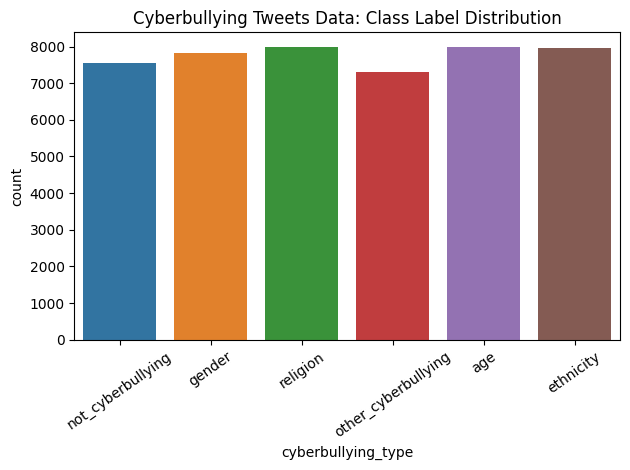

In [271]:
"""visualize the distribution of class labels in the data"""

sns.countplot(data=tweets, x=tweets['cyberbullying_type'])
plt.xticks(rotation=35)
plt.title('Cyberbullying Tweets Data: Class Label Distribution')
plt.tight_layout()

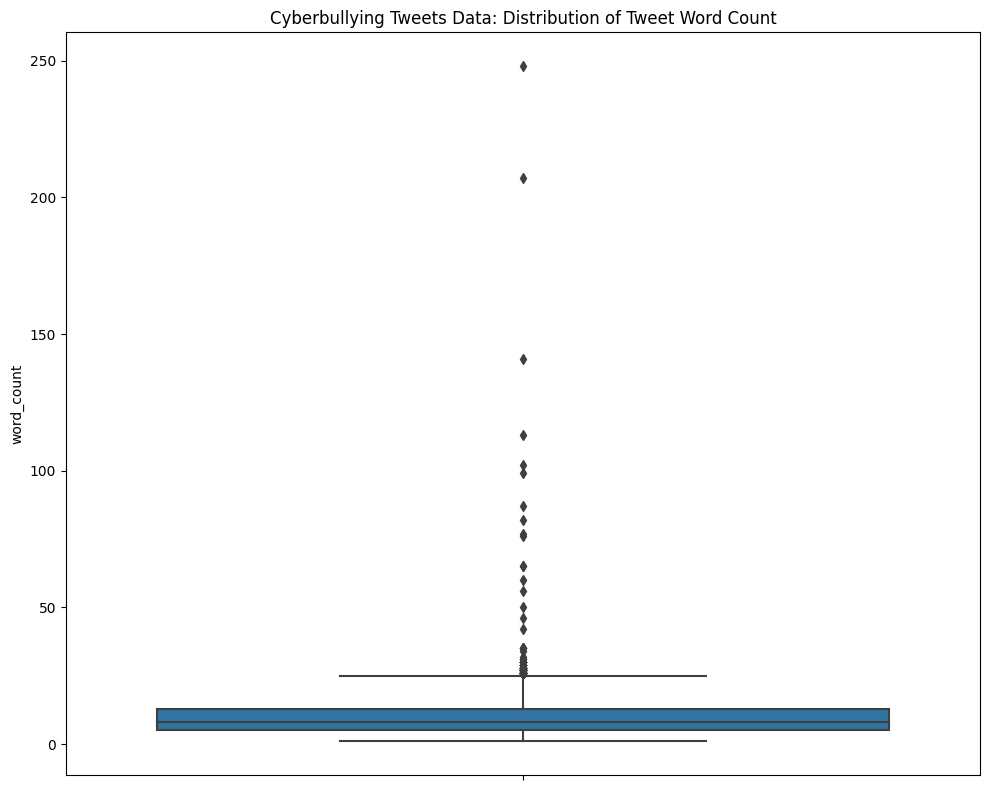

In [274]:
"""visualize the distribution of tweet text word count"""

# get a rough word count for each tweet
tweets['word_count'] = tweets['tweet_text'].apply(lambda x: len(x.split(" ")))
# plot a histogram to view the distribution of word count
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=tweets, y='word_count')
plt.title('Cyberbullying Tweets Data: Distribution of Tweet Word Count')
plt.tight_layout()

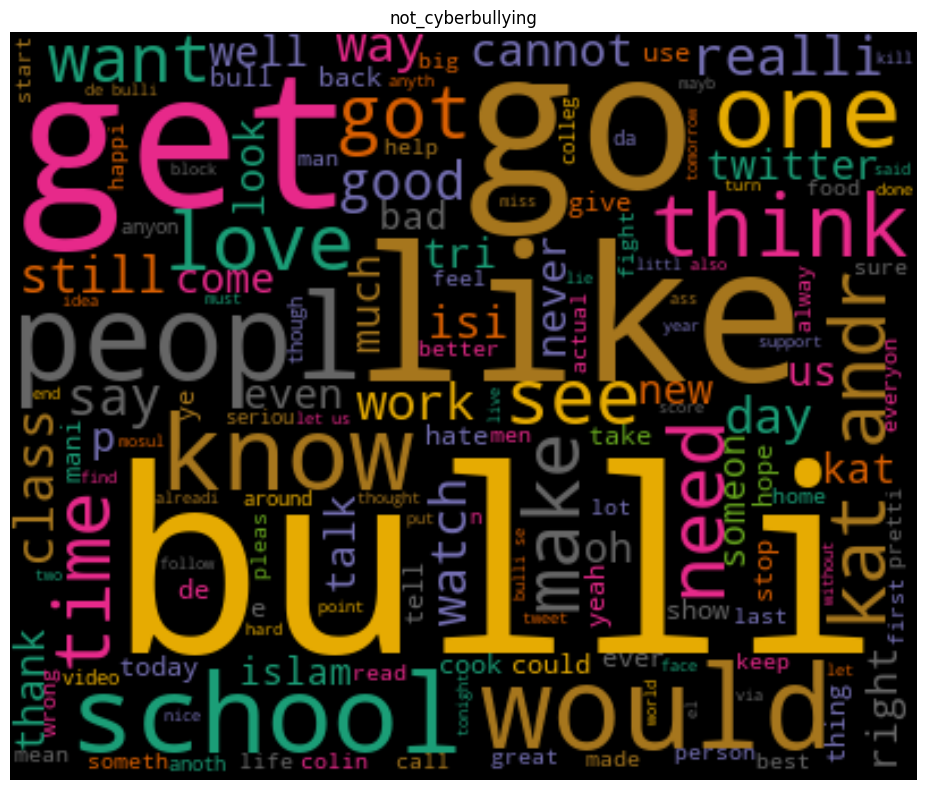

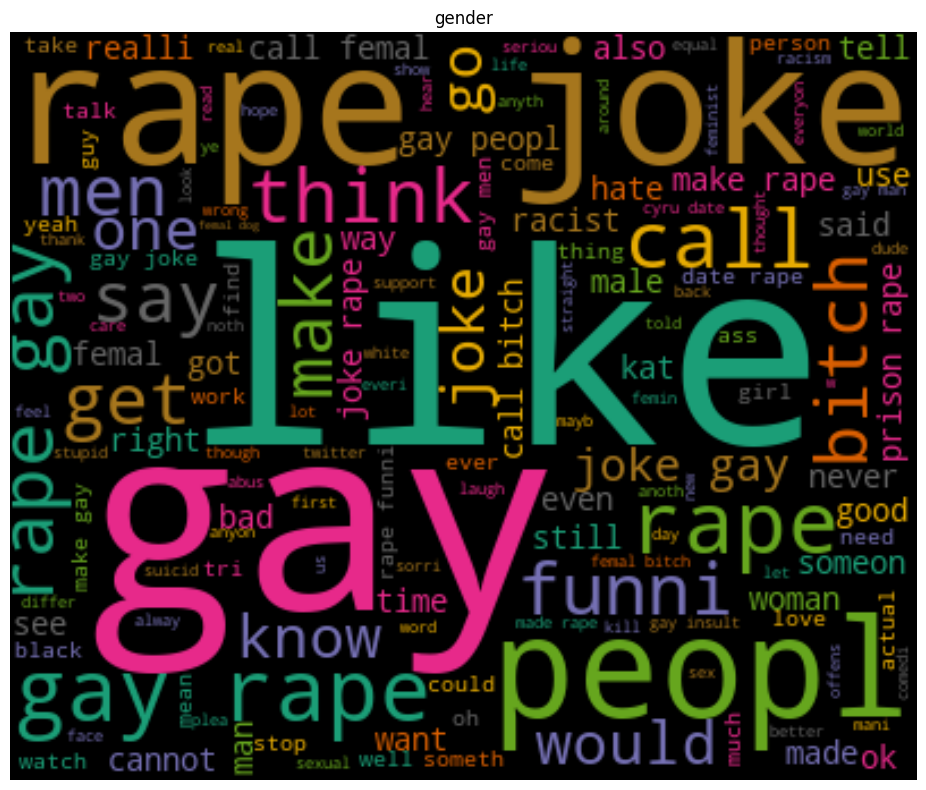

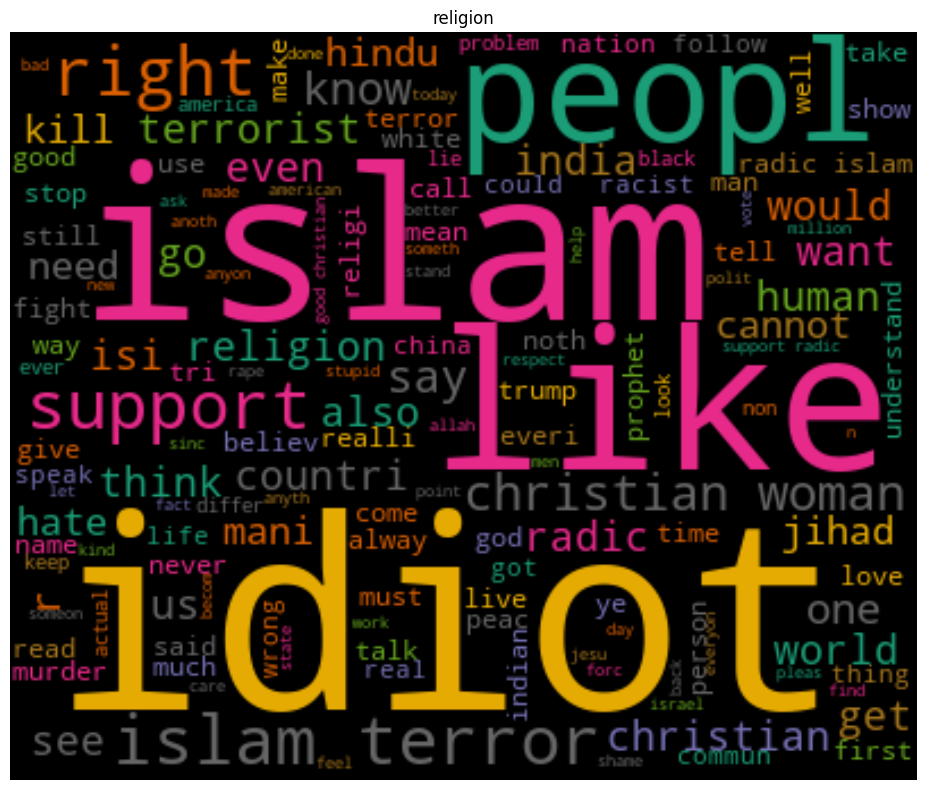

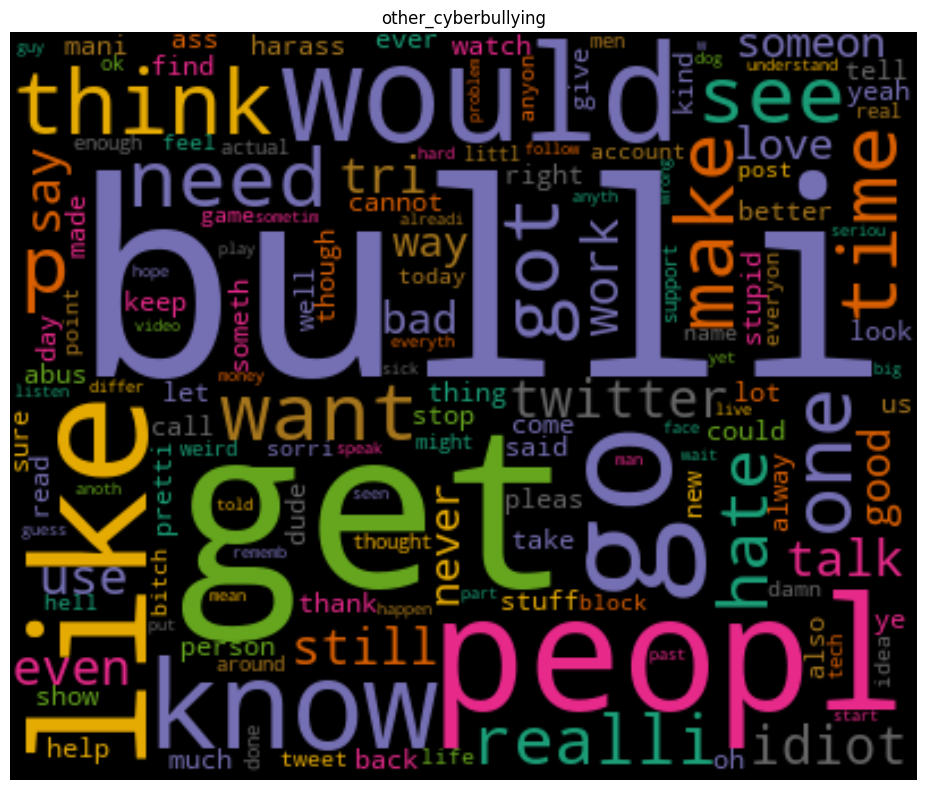

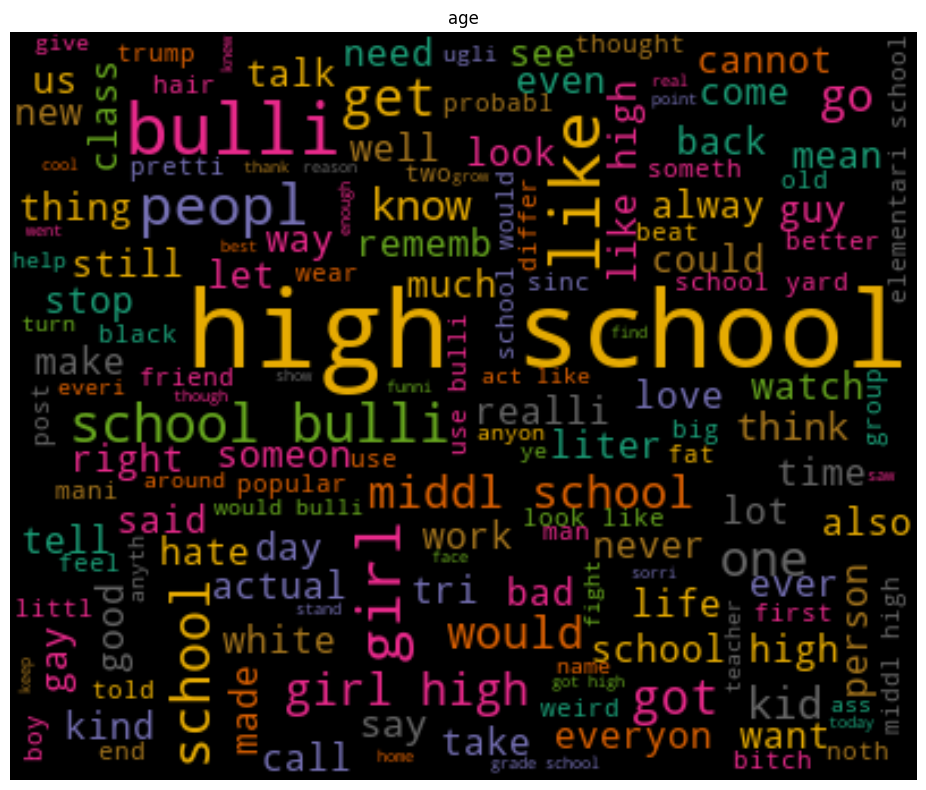

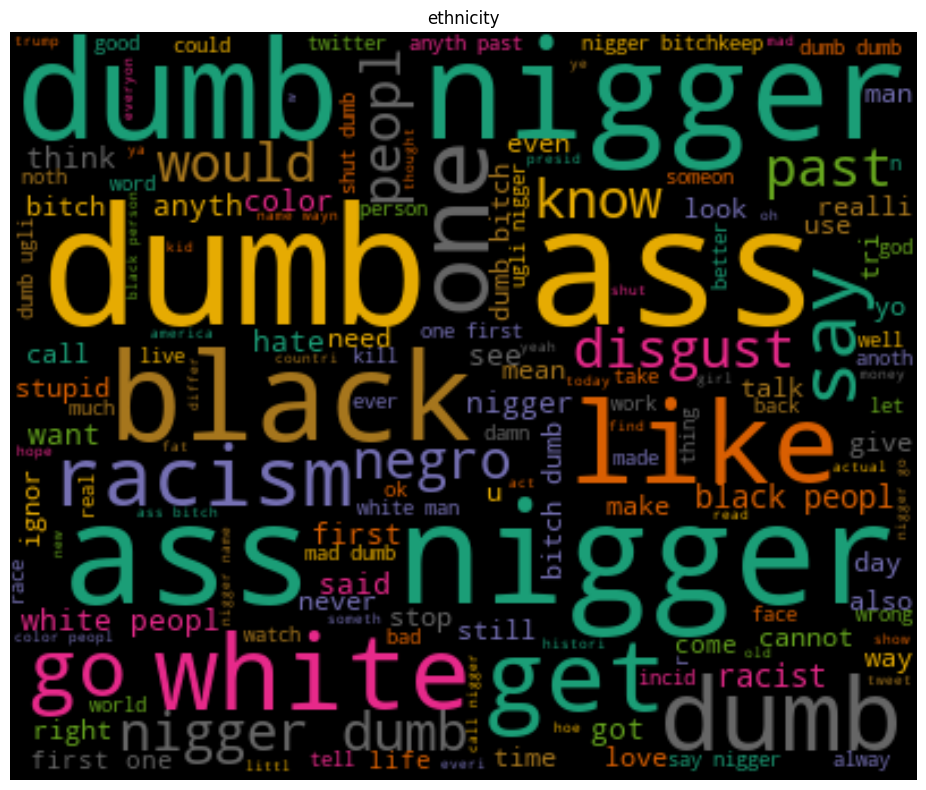

In [275]:
"""Create a word cloud from tweets for each cyberbullying category label"""

# define a function to create a word cloud 
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2",
                 stopwords=stopwords.words('english')).generate_from_text(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.tight_layout()
  plt.show()

# get list of cyberbullying categories
labels = list(tweets['cyberbullying_type'].unique())
for label in labels:
  text = " ".join( word for word in tweets[tweets['cyberbullying_type'] == label]['tweet_text'] if 'http' not in word)
  generate_wordcloud(text, label)

## *Data Preprocessing: Part 2*

*Objectives*

- Drop the word_count feature from the data
- Split the data into training, training test and validation sets
- Check class label distribution following split

In [276]:
"""drop word_count feature from the data"""

tweets.drop(columns=['word_count'], inplace=True)

In [282]:
"""split the data into training, validation, and test sets"""

# drop the tweet_length column, it's no longer needed
#tweets.drop(columns=['tweet_length'], inplace=True)
X = tweets.iloc[:, :-1]
y = tweets.iloc[:, -1:]
# get training and ttest set with sklearn train, test split functionality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                    random_state=42)
# get validation and test set with sklearn train, test split functionality
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, stratify=y_test,
                                                    random_state=42)

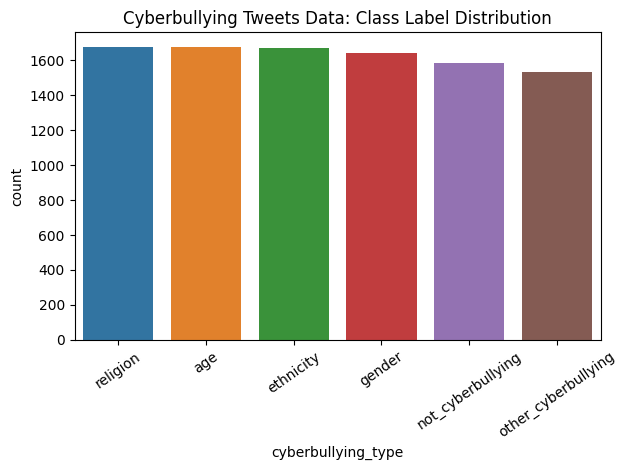

In [283]:
"""check the distribution of labels in the train, test, and validation sets following split"""

sns.countplot(data=y_val, x='cyberbullying_type')
plt.xticks(rotation=35)
plt.title('Cyberbullying Tweets Data: Class Label Distribution')
plt.tight_layout()

In [284]:
"""encode class labels as intteger values"""

encoder = LabelEncoder()
encoder.fit(y_train.to_numpy().flatten())
y_train = encoder.transform(y_train.to_numpy().flatten())
y_val = encoder.transform(y_val.to_numpy().flatten())
y_test = encoder.transform(y_test.to_numpy().flatten())

In [280]:
encoder.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [285]:
"""convert text to numeric values for modeling"""

vectorizer = CountVectorizer()
vectorizer.fit(X_train['tweet_text'].tolist())

CountVectorizer()

In [286]:
X_train_mat = vectorizer.transform(X_train['tweet_text'].tolist())
X_val_mat = vectorizer.transform(X_val['tweet_text'].tolist())

In [287]:
X_train_mat.shape

(32620, 10354)

In [288]:
"""train a Mulitnomial Naive Bayes Model"""

mnb = MultinomialNB()
mnb.fit(X_train_mat, y_train)
mnb.score(X_val_mat, y_val)

0.7158185162477008

In [290]:
"""train a support vector classifier"""

svc = SVC()
svc.fit(X_train_mat, y_train)
svc.score(X_test_mat, y_test)

0.7765855984740105